https://www.coursera.org/learn/classification-vector-spaces-in-nlp/lecture/dDdRc/welcome-to-the-nlp-specialization

Course on NLP on coursera

Kind of sentiment analysis and introduction to representation of text as vectors.

"Learn to extract features from text into numerical vectors, then build a binary classifier for tweets using a logistic regression!"

[data-set] = http://www.nltk.org/howto/twitter.html#corpus_reader


In [1]:
# import nltk
# nltk.download('twitter_samples')

Data set was inserted to repository itself (more precisely to folder named 'DataSets'). If will be some problem then download data set with commented code above this cell. Then you should has correct path as u can see few cells bellow (variable named path_to_dataset).


In [165]:
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples
import os

In [166]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [167]:
print(os.getcwd())

C:\Users\Vojta\Desktop\own\university\ing\projects\seminar\analysis\jupyters\Week 1\LogisticRegression


In [177]:
path_to_dataset = '..\\..\\DataSets\\Tweets\\'

In [179]:
name_of_negative = 'negative_tweets.json'
negative_tweets = pd.read_json(f'{path_to_dataset}{name_of_negative}', lines=True)

In [180]:
name_of_positive = 'positive_tweets.json' 
positive_tweets = pd.read_json(f'{path_to_dataset}{name_of_positive}', lines=True)

Raw data loaded from json. These are negative tweets. 

In [181]:
negative_tweets.head()

,contributors,coordinates,text,user,retweet_count,favorited,entities,source,truncated,geo,...,in_reply_to_user_id,created_at,metadata,favorite_count,id_str,id,quoted_status,quoted_status_id,possibly_sensitive,quoted_status_id_str
0,NaN,None,hopeless for tmr :(,"{'screen_name': 'yuwraxkim', 'time_zone': 'Jak...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,None,...,NaN,2015-07-24 10:42:49+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624530164626534400,624530164626534400,NaN,NaN,NaN,NaN
1,NaN,None,Everything in the kids section of IKEA is so c...,"{'screen_name': 'EveHollyHousley', 'time_zone'...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com/download/iphone"" r...",False,None,...,NaN,2015-07-24 10:42:48+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624530162890219520,624530162890219521,NaN,NaN,NaN,NaN
2,NaN,None,@Hegelbon That heart sliding into the waste ba...,"{'screen_name': 'prostgrad', 'time_zone': 'Ath...",0,False,"{'hashtags': [], 'user_mentions': [{'id_str': ...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,1.633281e+09,2015-07-24 10:42:48+00:00,"{'iso_language_code': 'en', 'result_type': 're...",1,624530162600812544,624530162600812544,NaN,NaN,NaN,NaN
3,NaN,None,"“@ketchBurning: I hate Japanese call him ""bani...","{'screen_name': 'burningyoppy', 'time_zone': '...",0,False,"{'hashtags': [], 'user_mentions': [{'id_str': ...","<a href=""http://twitter.com/download/iphone"" r...",False,None,...,2.185486e+08,2015-07-24 10:42:48+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624530161011048448,624530161011048448,NaN,NaN,NaN,NaN
4,NaN,None,"Dang starting next week I have ""work"" :(","{'screen_name': '3angiefalangie', 'time_zone':...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com/download/iphone"" r...",False,None,...,NaN,2015-07-24 10:42:47+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624530159928934400,624530159928934400,NaN,NaN,NaN,NaN


Raw positive tweets loaded from json using nltk package.

In [182]:
positive_tweets.head()

,contributors,coordinates,text,user,retweet_count,favorited,entities,source,truncated,geo,...,in_reply_to_user_id,created_at,metadata,favorite_count,id_str,id,possibly_sensitive,quoted_status_id,quoted_status,quoted_status_id_str
0,NaN,None,#FollowFriday @France_Inte @PKuchly57 @Milipol...,"{'time_zone': 'Paris', 'profile_background_ima...",0,False,"{'hashtags': [{'indices': [0, 13], 'text': 'Fo...","<a href=""https://commun.it"" rel=""nofollow"">Com...",False,None,...,NaN,2015-07-24 08:23:36+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495129303351296,624495129303351296,NaN,NaN,NaN,NaN
1,NaN,None,@Lamb2ja Hey James! How odd :/ Please call our...,"{'time_zone': 'London', 'profile_background_im...",0,False,"{'hashtags': [], 'user_mentions': [{'screen_na...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,19458835.0,2015-07-24 08:23:35+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495128510656512,624495128510656513,NaN,NaN,NaN,NaN
2,NaN,None,@DespiteOfficial we had a listen last night :)...,"{'time_zone': 'Casablanca', 'profile_backgroun...",0,False,"{'hashtags': [], 'user_mentions': [{'screen_na...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,275918243.0,2015-07-24 08:23:35+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495126535106560,624495126535106560,NaN,NaN,NaN,NaN
3,NaN,None,@97sides CONGRATS :),"{'time_zone': 'Paris', 'profile_background_ima...",0,False,"{'hashtags': [], 'user_mentions': [{'screen_na...","<a href=""http://twitter.com/download/iphone"" r...",False,None,...,774644509.0,2015-07-24 08:23:35+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495126170238976,624495126170238976,NaN,NaN,NaN,NaN
4,NaN,None,yeaaaah yippppy!!! my accnt verified rqst has...,"{'time_zone': None, 'profile_background_image_...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,None,...,NaN,2015-07-24 08:23:34+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495124148391936,624495124148391936,NaN,NaN,NaN,NaN


In [183]:
size_of_positive = positive_tweets.shape
size_of_negative = negative_tweets.shape

In [184]:
import matplotlib.pyplot as plt

As u see datasets are with equal size. It can be sign of good dataset.

([<matplotlib.axis.XTick at 0x25784844b50>,
 [Text(0, 0, 'size_of_positive'), Text(1, 0, 'size_of_negative')])

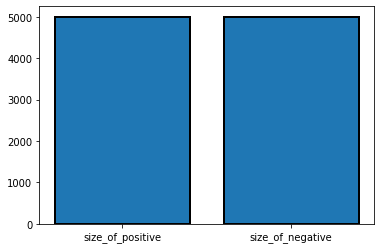

In [185]:
values = np.arange(2)
plt.bar(values, height=[size_of_positive[0], size_of_negative[0]], align='center', linewidth=2, edgecolor='k')
plt.xticks(values, ['size_of_positive', 'size_of_negative'])

In [186]:
positive = positive_tweets[['text']].copy()
negative = negative_tweets[['text']].copy()

positive.head()
negative.head()

,text
0,hopeless for tmr :(
1,Everything in the kids section of IKEA is so c...
2,@Hegelbon That heart sliding into the waste ba...
3,"“@ketchBurning: I hate Japanese call him ""bani..."
4,"Dang starting next week I have ""work"" :("


In [187]:
positive.loc[:, 'sentiment'] = 1
negative.loc[:, 'sentiment'] = 0

Tweet preprocessing.

Build vocabulary.

In [188]:
def build_vocabulary(text):
    vocabulary = {}
    for value in text.split(' '):
        if value in vocabulary:
            vocabulary[value] += 1
        else:
            vocabulary[value] = 0
            
    return vocabulary

In [189]:
def create_sorted_vocabulary(df):
    joined_pos = " ".join(df.text.values)
    pos_vocabulary = build_vocabulary(joined_pos)
    pos_sorted_by_occurences = {k: v for k, v in sorted(pos_vocabulary.items(), key=lambda item: item[1], reverse=True)}
    return pos_sorted_by_occurences

In [190]:
pos_sorted_by_occurences = create_sorted_vocabulary(positive)
print(len(pos_sorted_by_occurences))

17657


In [191]:
neg_sorted_by_occurences = create_sorted_vocabulary(negative)
print(len(neg_sorted_by_occurences))

14539


([<matplotlib.axis.XTick at 0x2578483e220>,
 [Text(0, 0, 'pos_term_size'), Text(1, 0, 'neg_term_size')])

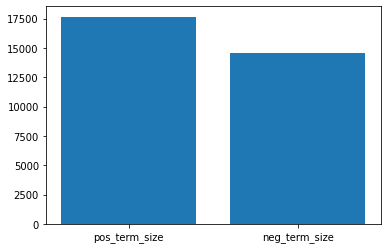

In [192]:
lengths = (len(pos_sorted_by_occurences), len(neg_sorted_by_occurences))
plt.bar(np.arange(len(lengths)), height=lengths)
plt.xticks(np.arange(len(lengths)), ['pos_term_size', 'neg_term_size'])

In [193]:
def plot_occurences_of_terms(sorted_dict, n):
    keys = list(sorted_dict.keys())[:n]
    values = list(sorted_dict.values())[:n]
    
    ids = np.arange(len(keys))
    plt.bar(ids, height=values, width=0.2)
    plt.xticks(ids, keys)

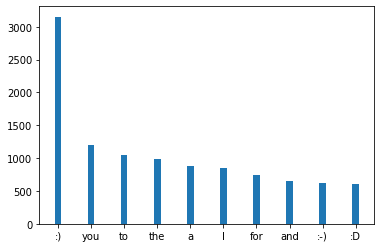

In [194]:
plot_occurences_of_terms(pos_sorted_by_occurences, 10)

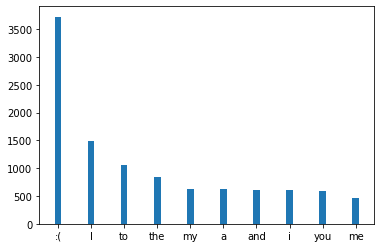

In [195]:
plot_occurences_of_terms(neg_sorted_by_occurences, 10)

In [196]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string
import re

In [197]:
def regex_clean(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet) #urls
    tweet = re.sub(r'#', '', tweet) #hashtahs
    tweet = re.sub(r'@(\w)*', '', tweet) # users
    return tweet

In [198]:
# testing of clean of tweet

stopwords_english = stopwords.words('english')
# print(stopwords_english) #!: list of stopwords from nltk package

print('a' in string.punctuation)
print('.' in string.punctuation)
print(string.punctuation)

def clean_tweet(tweet):
    tweet = regex_clean(tweet)    
    tokenizer = TweetTokenizer()
    tweet_tokenized = tokenizer.tokenize(tweet)
    tweet_tokenized = [word.lower() for word in tweet_tokenized if word not in stopwords_english and word not in string.punctuation] 
    stemmer = PorterStemmer()
    tweet_tokenized = [stemmer.stem(word) for word in tweet_tokenized]
    return " ".join(tweet_tokenized)



test_tweet = positive.loc[0, :]
print(test_tweet.text)
clean_tweet(test_tweet.text)

False
True
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


'followfriday top engag member commun week :)'

In [199]:
cleaned_pos = positive.text.map(clean_tweet)
cleaned_neg = negative.text.map(clean_tweet)

positive['text'] = cleaned_pos 
negative['text'] =  cleaned_neg

pos_dict = create_sorted_vocabulary(positive)
neg_dict = create_sorted_vocabulary(negative)

print(len(pos_dict))
print(len(neg_dict))

6734
6580


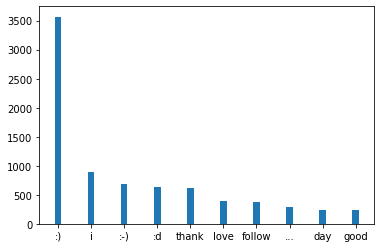

In [200]:
plot_occurences_of_terms(pos_dict, 10)

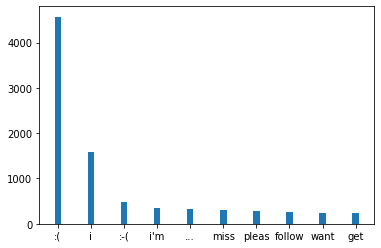

In [201]:
plot_occurences_of_terms(neg_dict, 10)

In [202]:
def factory_iteration(current_dict):
    def iteration_map(token):
        if token in current_dict:
            return current_dict[token]
        else:
            return 0
    return iteration_map


def map_call(tweet, current_dict):
    result = list(map(factory_iteration(current_dict), tweet.split(' ')))
    return result
    
def information_extraction(tweet):
    positive_sum = sum(map_call(tweet, pos_dict))
    negative_sum = sum(map_call(tweet, neg_dict))
    return np.array([1, positive_sum, negative_sum])

In [203]:
test_values_information_extraction = positive.text.values[0] 

print(test_values_information_extraction)
information_extraction(test_values_information_extraction)

followfriday top engag member commun week :)


array([   1, 3757,   67])

In [204]:
merged = pd.concat([positive, negative])
merged

,text,sentiment
0,followfriday top engag member commun week :),1
1,hey jame how odd :/ pleas call contact centr 0...,1
2,listen last night :) as you bleed amaz track w...,1
3,congrat :),1
4,yeaaaah yippppi accnt verifi rqst succeed got ...,1
...,...,...
4995,i wanna chang avi usanel :(,0
4996,my puppi broke her foot :(,0
4997,where' jaebum babi pictur :(,0
4998,but mr ahmad maslan cook :(,0


# Run bellow cels to show results

In [205]:
tweets = merged.text.values

X = [information_extraction(tweet) for tweet in tweets]
y = merged.sentiment.values

n_values = 5


In [206]:
#POSITIVE
print(X[:n_values])
print(y[:n_values])

[array([   1, 3757,   67]), array([   1, 4473,  527]), array([   1, 3890,  272]), array([   1, 3587,    2]), array([   1, 3900,  272])]
[1 1 1 1 1]


In [207]:
#NEGATIVE
print(X[-n_values: len(X)])
print(y[-n_values: len(y)])

[array([   1,  940, 6278]), array([   1,   73, 4698]), array([   1,   30, 4635]), array([   1,   41, 4637]), array([   1, 1005, 2169])]
[0 0 0 0 0]


In [208]:
from sklearn.model_selection import train_test_split

In [209]:
TEST_SIZE_SET = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_SET) 

print(len(X_train))
print(len(X_test))

8000
2000


In [210]:
def print_score(score):
    print(f'Score ->> {score}')

In [211]:
from sklearn.linear_model import LogisticRegression

In [212]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted_label = clf.predict(X_test)

In [213]:
from sklearn.metrics import accuracy_score

In [214]:
score = accuracy_score(y_test, predicted_label)
print_score(score) #good

Score ->> 0.989


Representation as suma of positive vs negative words in tweet. Kind of approach where we are going to reduce dimension of V to dimension of 3. 
Example: 
    [bias, suma(pos), suma(neg)]. 
Our vocabulary has key as word and
dimension of 2. Where every key (word) has discrete number value describing occurences in positive tweet and opossite negative tweet.

Representation as TF = term frequency. In this approach we are going to learn len(V) parameters, which is quite unefficient. Every tweet will be represented as vector with few values >= 1 and a lot 0. ..Sparse matrix.

In [215]:
from sklearn.feature_extraction.text import CountVectorizer

Learn the vocabulary dictionary and return document-term matrix.

In [216]:
def custom_predict(vectorizer_instance, corpus):
    clf = LogisticRegression()
    
    X = vectorizer_instance.fit_transform(corpus)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE_SET)
    
    clf.fit(X_train, y_train)
    predicted_values = clf.predict(X_test)
    
    score = accuracy_score(y_test, predicted_values)
    print_score(score)
    return clf
    
    
    
    

In [217]:
corpus = merged.text.values
vectorizer = CountVectorizer()

custom_predict(vectorizer, corpus)
# vectorizer2 = CountVectorizer(ngram_range=(1,2))

Score ->> 0.7485


LogisticRegression()

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
custom_predict(tfidf_vectorizer, corpus)

Score ->> 0.7615


LogisticRegression()

In [219]:
NGRAM_RANGE = (1, 5)

In [220]:
vectorizer2 = CountVectorizer(ngram_range=NGRAM_RANGE)
custom_predict(vectorizer2, corpus)

Score ->> 0.7455


LogisticRegression()

In [221]:
tfidf_vectorizer2 = TfidfVectorizer(ngram_range=NGRAM_RANGE)
clf = custom_predict(tfidf_vectorizer2, corpus)

Score ->> 0.759
